In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
def find_latest_log():
    folder = '../logger/logs'
    logs = os.listdir(folder)
    return folder + os.sep + logs[-1]


In [3]:

logfile = find_latest_log()

#logfile = '../logger/logs\loggs_230212_1637.csv'
#logfile = '../logger/logs\loggs_230212_1642.csv'
#logfile = '../logger/logs\loggs_230212_1702.csv'

print(logfile)
df = pd.read_csv(logfile)
df


../logger/logs\loggs_230224_2217.csv


,time_ms,signal_0,signal_1,signal_2,signal_3,signal_4,signal_5,signal_6,signal_7,signal_8,signal_9,signal_10,signal_11,signal_12,signal_13,signal_14,signal_15,signal_16,signal_17,signal_18
0,1165664256,0.0,-30.0,0.666667,0.666667,0.666667,916.0,1010.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1165668352,0.0,-30.0,0.666667,0.666667,0.666667,902.0,1013.0,1047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1165672448,0.0,-30.0,0.666667,0.666667,0.666667,891.0,995.0,997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1165676544,0.0,-30.0,0.666667,0.666667,0.666667,912.0,1012.0,1048.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1165680640,0.0,-30.0,0.666667,0.666667,0.666667,890.0,1029.0,985.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,1181341696,0.0,-30.0,0.666667,0.666667,0.666667,895.0,998.0,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1389,1181342720,0.0,-30.0,0.666667,0.666667,0.666667,904.0,992.0,1025.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1390,1181343744,0.0,-30.0,0.666667,0.666667,0.666667,911.0,1011.0,1016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391,1181344768,0.0,-30.0,0.666667,0.666667,0.666667,900.0,1014.0,1014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


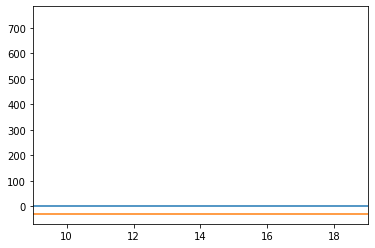

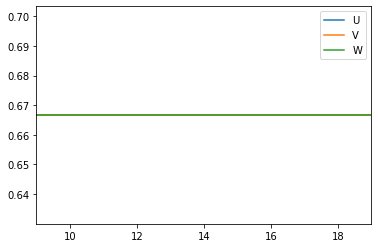

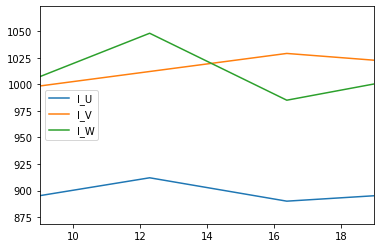

In [4]:
t = df['time_ms']*1/1000
t = t - t[0]

enc_ang = df['signal_0']
elec_ang = df['signal_1']

#Phase voltage
U = df['signal_2']
V = df['signal_3']
W = df['signal_4']

# phase current
I_U = df['signal_5']
I_V = df['signal_6']
I_W = df['signal_7']

t_lim = [0,max(t)]
#t_lim = [5.5,7]
t_lim = [9,19]
plt.plot(t,enc_ang)
plt.plot(t,elec_ang)
plt.xlim(t_lim)

plt.figure()
plt.plot(t,U,label='U')
plt.plot(t,V,label='V')
plt.plot(t,W,label='W')
plt.xlim(t_lim)
plt.legend()

plt.figure()
plt.plot(t,I_U,label='I_U')
plt.plot(t,I_V,label='I_V')
plt.plot(t,I_W,label='I_W')
plt.xlim(t_lim)
plt.legend()



2048.0


(-1.0, 1.0)

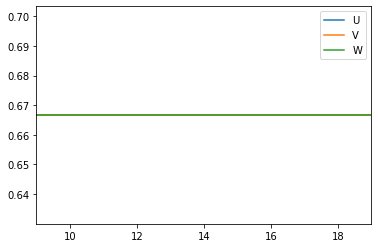

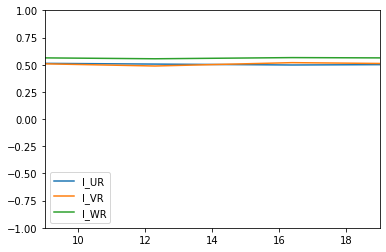

In [5]:

center = 2000
center = 2**12 / 2
print(center)

I_UR = -1*(I_V - center) *1/center
I_VR = -1*(I_W -center) *1/center
I_WR = -1*(I_U -center)*1/center

plt.plot(t,U,label='U')
plt.plot(t,V,label='V')
plt.plot(t,W,label='W')
plt.xlim(t_lim)
plt.legend()

plt.figure()

plt.plot(t,I_UR,label='I_UR')
plt.plot(t,I_VR,label='I_VR')
plt.plot(t,I_WR,label='I_WR')
plt.xlim(t_lim)
plt.legend()
plt.ylim([-1,1])


Text(0.5, 1.0, 'Current')

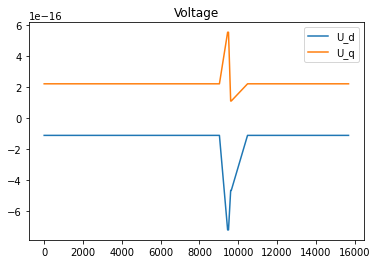

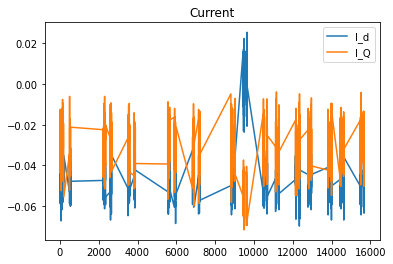

In [6]:


def clarque_inv(elec, u,v,w):

    alfa = []
    beta = []

    rad120 = np.deg2rad(120)

    for i in range(len(elec)):

        ei = elec[i]*np.pi/180

        Ue = np.array([np.cos(ei), np.sin(ei)])
        Ve = np.array([np.cos(ei + rad120), np.sin(ei + rad120)])
        We = np.array([np.cos(ei + 2*rad120), np.sin(ei + 2*rad120)])

        U = Ue*u[i] + Ve*v[i] + We*w[i]

        alfa.append(U[0])
        beta.append(U[1])

    return alfa,beta

alf,bet = clarque_inv(elec_ang,U,V,W)

plt.plot(t,alf,label='U_d')
plt.plot(t,bet,label='U_q')
plt.legend()
plt.title('Voltage')

I_alf,I_bet = clarque_inv(elec_ang,I_UR,I_VR,I_WR)

plt.figure()
plt.plot(t,I_alf,label='I_d')
plt.plot(t,I_bet,label='I_Q')
plt.legend()
plt.title('Current')